# Observations and Insights

1. Capomulin seems very effective at decreasing tumor volume size over time making it a viable contender to
    Ramicane, which was the best drug tested.
    
2. Both Capomulin and Ramicane had the smallest median and variance in tumor volume size indicating 
    their efficacy as potential great treatments at reducing tumor size over the other treatments.
    
3. Using the correlation coefficient and linear regression model it seems that there is a correlation in
    larger the mouse is the larger the tumor is also. This simulates real life as humans come in a variety 
    of weights and sizes but it does present bias as not all mice were the same size. 

# Dependencies and Starter Code

In [92]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
data_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')

# Display the data table for preview
data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [93]:
# Checking for the number of mice.
data_df['Mouse ID'].value_counts()

g989    13
k403    10
j365    10
j984    10
k210    10
        ..
v199     1
t573     1
f932     1
b447     1
u153     1
Name: Mouse ID, Length: 249, dtype: int64

In [94]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates_df = data_df.set_index('Mouse ID')
duplicates_df.loc['g989']

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,5,48.786801,0
g989,Propriva,Female,21,26,5,47.570392,0
g989,Propriva,Female,21,26,10,51.745156,0
g989,Propriva,Female,21,26,10,49.880528,0
g989,Propriva,Female,21,26,15,51.325852,1
g989,Propriva,Female,21,26,15,53.442020,0
g989,Propriva,Female,21,26,20,55.326122,1


In [95]:
# Optional: Get all the data for the duplicate mouse ID. 
all_duplicates = pd.DataFrame(duplicates_df)
all_duplicates


,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
k403,Ramicane,Male,21,16,0,45.000000,0
k403,Ramicane,Male,21,16,5,38.825898,0
k403,Ramicane,Male,21,16,10,35.014271,1
k403,Ramicane,Male,21,16,15,34.223992,1
k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...
z969,Naftisol,Male,9,30,25,63.145652,2
z969,Naftisol,Male,9,30,30,65.841013,3
z969,Naftisol,Male,9,30,35,69.176246,4


In [96]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
data_df2 = duplicates_df.drop(['g989'])
data_df2.shape

(1880, 7)

In [97]:
# Checking the number of mice in the cleaned up DataFrame.
data_df3 = data_df2.reset_index()
data_df3['Mouse ID'].value_counts()


k403    10
o287    10
j984    10
k210    10
k382    10
        ..
h428     1
o848     1
t573     1
d133     1
x226     1
Name: Mouse ID, Length: 248, dtype: int64

## Summary Statistics

In [98]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

#Using groupby to group data by drug regimen
sumstat_df = data_df3.groupby ('Drug Regimen')

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
drug_mean = sumstat_df['Tumor Volume (mm3)'].mean()
drug_median = sumstat_df['Tumor Volume (mm3)'].median()
drug_vari = sumstat_df['Tumor Volume (mm3)'].var()
drug_stdev = sumstat_df['Tumor Volume (mm3)'].std()
drug_sem = sumstat_df['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary dataframe with appropiate calculations.
sumstat_dis_df = pd.DataFrame({'Mean': drug_mean, 'Median': drug_median, 'Variance': drug_vari, 'Standard Deviation': drug_stdev, 'SEM': drug_sem})
sumstat_dis_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [99]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
sumstat_df2 = data_df3.groupby (['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
# Using the aggregation method, produce the same summary statistics in a single line
sumstat_df2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<function matplotlib.pyplot.show(close=None, block=None)>

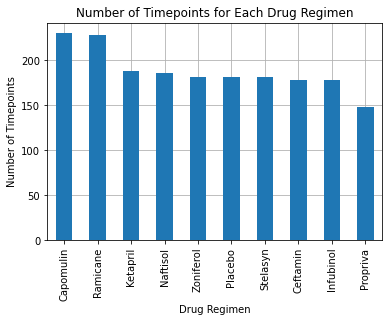

In [100]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
timepoints = data_df3.groupby(['Drug Regimen'])['Timepoint'].count()
timepoints.sort_values(ascending=False).plot.bar(zorder=4)

#Setting labels for axis and title
plt.ylabel('Number of Timepoints')
plt.title('Number of Timepoints for Each Drug Regimen')

#Made grid with lower z-order than the z-order set for the bars previously 
plt.grid(zorder=0)

#Display
plt.show

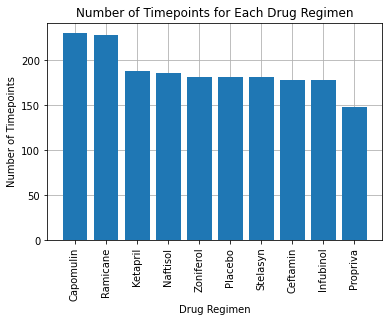

In [101]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
# Values are sorted first // Plotting a bar chart 
timepoints_py = timepoints.sort_values(ascending=False)
plt.bar(timepoints_py.index, timepoints_py.values, zorder=4)

#Setting labels for axis and title
plt.ylabel('Number of Timepoints')
plt.xlabel('Drug Regimen')

plt.title('Number of Timepoints for Each Drug Regimen')

#Made grid with lower z-order than the z-order set for the bars previously 
plt.grid(zorder=0)

#Rotate tick marks 90 degrees for easier readability 
plt.xticks(rotation = 90)

#Display
plt.show()


<AxesSubplot:title={'center':'Distribution by Sex'}>

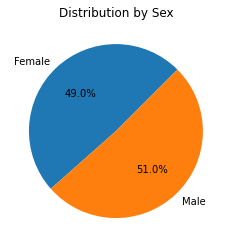

In [102]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

#Distribution data by sex 
sexes = data_df3.groupby(['Sex'])['Sex'].count()

#Plotting pie chart at slightly different start angle to give perspective it seems
# 0, 90, and 180 degrees look overwhelmingly male
sexes.plot.pie(startangle=45, figsize=(4, 4), ylabel='', autopct="%1.1f%%", title='Distribution by Sex')


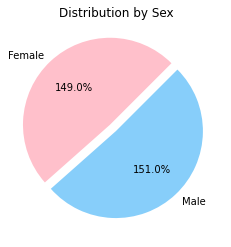

In [103]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

#Distribution data by sex 
sexes_py = pd.DataFrame(sexes)

#Setting and creating colors,labels and explode feature for axis// having fun with 'boy' and 'girl' colors  
labels=['Female', 'Male']
colors = ['pink','lightskyblue']
explode = (0.1, 0)

#Making matplotlib to plot a pie chart at slightly different start angle to give perspective it seems
# 0, 90, and 180 degrees look overwhelmingly male
plt.pie(sexes, labels=labels, startangle =45, explode = explode, colors=colors, autopct="1%.1f%%")
plt.title('Distribution by Sex')

#Display 
plt.show()

## Quartiles, Outliers, and Boxplots

In [104]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_tp = data_df3.groupby(['Mouse ID'])['Timepoint'].max()
max_tp_df = pd.DataFrame(max_tp)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tvol_df = pd.merge(data_df3, max_tp_df, on=('Mouse ID', 'Timepoint'))
tvol_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1


In [105]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tv_capo = []
tv_rami = []
tv_infu = []
tv_ceft = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 


# Locate the rows which contain mice on each drug and get the tumor volumes
for index, row in tvol_df.iterrows():
    if row["Drug Regimen"] == 'Capomulin':
        tv_capo.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == treatments[1]:
        tv_rami.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == treatments[2]:
        tv_infu.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == treatments[3]:
        tv_ceft.append(row['Tumor Volume (mm3)'])
        
# add subset
treatments_df = pd.DataFrame({'Capomulin': tv_capo,
                               treatments[1]: tv_rami,
                               treatments[2]: tv_infu,
                               treatments[3]: tv_ceft
                              })
treatments_df_max = treatments_df.max()
treatments_df_min = treatments_df.min()

treatments_df  

,Capomulin,Ramicane,Infubinol,Ceftamin
0,23.343598,22.050126,67.973419,62.999356
1,28.484033,29.128472,65.525743,45.000000
2,28.430964,30.276232,57.031862,56.057749
3,30.485985,30.564625,66.083066,55.742829
4,31.023923,30.638696,72.226731,48.722078
5,31.896238,31.560470,36.321346,47.784682
6,32.377357,31.095335,60.969711,61.849023
7,33.329098,33.397653,62.435404,68.923185
8,34.455298,32.978522,60.918767,67.748662
9,37.311846,33.562402,67.289621,57.918381


In [106]:
# Determine outliers using quartiles, upper, and lower bounds
# If the data is in a dataframe, we use pandas to give quartile calculations

#Capomulin Quaritle Statistics (quartiles, upper, and lower bounds)
cap_quartiles = treatments_df[treatments[0]].quantile([.25,.5,.75])
cap_lowerq = cap_quartiles[0.25]  
cap_upperq = cap_quartiles[0.75]
cap_iqr = cap_upperq-cap_lowerq
cap_lowerb = cap_lowerq - (1.5*cap_iqr)
cap_upperb = cap_upperq + (1.5*cap_iqr)

#Ramicane Quaritle Statistics (quartiles, upper, and lower bounds)
ram_quartiles = treatments_df[treatments[1]].quantile([.25,.5,.75])
ram_lowerq = ram_quartiles[0.25]
ram_upperq = ram_quartiles[0.75]
ram_iqr = ram_upperq-ram_lowerq
ram_lowerb = ram_lowerq - (1.5*ram_iqr)
ram_upperb = ram_upperq + (1.5*ram_iqr)                              

#Infubinol Quaritle Statistics (quartiles, upper, and lower bounds)
inf_quartiles = treatments_df[treatments[2]].quantile([.25,.5,.75])
inf_lowerq = inf_quartiles[0.25]
inf_upperq = inf_quartiles[0.75]
inf_iqr = inf_upperq-inf_lowerq
inf_lowerb = inf_lowerq - (1.5*inf_iqr)
inf_upperb = inf_upperq + (1.5*inf_iqr)   
                              
#Ceftamin Quaritle Statistics (quartiles, upper, and lower bounds)                             
cef_quartiles = treatments_df[treatments[3]].quantile([.25,.5,.75])
cef_lowerq = cef_quartiles[0.25]
cef_upperq = cef_quartiles[0.75]
cef_iqr = cef_upperq-cef_lowerq
cef_lowerb = cef_lowerq - (1.5*cef_iqr)
cef_upperb = cef_upperq + (1.5*cef_iqr) 

#Quantitatively checking for any outliers;
outliers = pd.DataFrame({'Drug': treatments,
                        'Lower Quartile':[cap_lowerq, ram_lowerq, inf_lowerq, cef_lowerq],
                        'Upper Quartile':[cap_upperq, ram_upperq, inf_upperq, cef_upperq],
                        'IQR':[cap_iqr,ram_iqr,inf_iqr,cef_iqr],
                        'Lower Bound': [cap_lowerb,ram_lowerb,inf_lowerb,cef_lowerb],
                        'Upper Bound': [cap_upperb,ram_upperb,inf_upperb,cef_upperb]})  

#Display in chart format like in Pandas homework                               
outliers
outliers_data = outliers.groupby('Drug')
outliers_data.sum()

,Lower Quartile,Upper Quartile,IQR,Lower Bound,Upper Bound
Drug,,,,,
Capomulin,32.377357,40.159220,7.781863,20.704562,51.832015
Ceftamin,48.722078,64.299830,15.577752,25.355450,87.666458
Infubinol,54.048608,65.525743,11.477135,36.832905,82.741446
Ramicane,31.560470,40.659006,9.098537,17.912664,54.306811


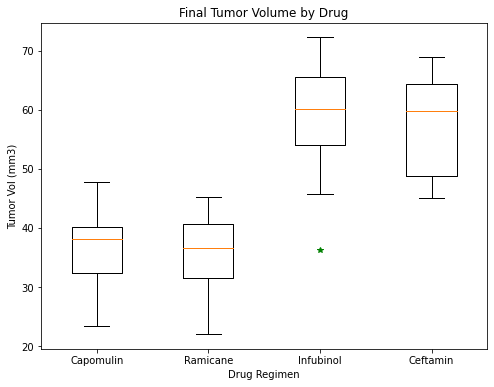

In [107]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
boxplot = [treatments_df[treatments[0]],
            treatments_df[treatments[1]],
            treatments_df[treatments[2]],
            treatments_df[treatments[3]]]
    
# used plt.subplots to define size
fig1, ax1 = plt.subplots(figsize=(8,6))

#Setting labels for axis and title
ax1.set_title('Final Tumor Volume by Drug') 
ax1.set_xlabel('Drug Regimen') # set our x
ax1.set_ylabel('Tumor Vol (mm3)') #set our y

# used ax.boxplot function and ran the parameter boxplot to create the boxplot
ax1.boxplot(boxplot, 0, 'g*')
plt.xticks([1,2,3,4], treatments) # set labels of each boxplot

#Display
plt.show()

## Line and Scatter Plots

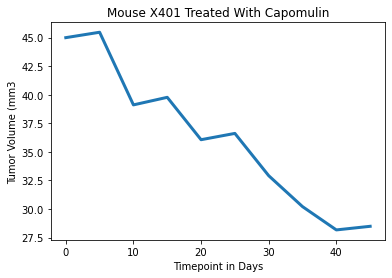

In [108]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

#Data points of a mouse treated with Capomulin 
lineplot_df = data_df3.loc[data_df3["Mouse ID"] == "x401",:]
lineplot_df

#define  x axis 
xaxis = lineplot_df["Timepoint"]

#define  y axis 
yaxtumor = lineplot_df["Tumor Volume (mm3)"]

# Adding our labels and title to plot
plt.title("Mouse X401 Treated With Capomulin")
plt.plot(xaxis, yaxtumor, linewidth=3, markersize=8)
plt.xlabel("Timepoint in Days")
plt.ylabel("Tumor Volume (mm3")

#Display
plt.show()

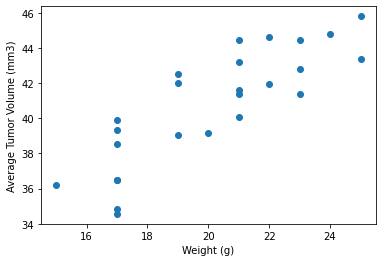

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,
b128,9.0,22.0,22.5,41.963636,0.70
b742,7.0,21.0,22.5,40.083699,0.00
f966,16.0,17.0,10.0,36.505973,0.00
g288,3.0,19.0,22.5,41.990097,0.80
g316,22.0,22.0,22.5,44.613344,1.00
i557,1.0,24.0,22.5,44.805810,0.20
i738,23.0,20.0,22.5,39.141053,0.60
j119,7.0,23.0,22.5,44.465236,0.60
j246,21.0,21.0,17.5,43.216925,0.25


In [109]:
# Generate a scatter plot of average tumor volume vs. mouse weightfor the Capomulin regimen

#Data only involving those mice treated with Capomulin
scatterp = data_df3.loc[data_df3["Drug Regimen"] == "Capomulin",:]

#Finding Average Tumor Volume 
avgcap = scatterp.groupby(['Mouse ID']).mean()

# Plotting a scatter plot and setting labels for axes
plt.scatter(avgcap['Weight (g)'],avgcap[("Tumor Volume (mm3)")])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

#Display
plt.show()
avgcap

## Correlation and Regression

In [110]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
corr=round(st.pearsonr(avgcap['Weight (g)'],avgcap['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume for Capomulin regimen is {corr}")

The correlation between mouse weight and average tumor volume for Capomulin regimen is 0.84


In [111]:
# Calculating linear regression with st.linregress() 
lr_model=st.linregress(avgcap['Weight (g)'], avgcap['Tumor Volume (mm3)'])
lr_model

LinregressResult(slope=0.9544396890241049, intercept=21.552160532685008, rvalue=0.8419363424694721, pvalue=1.3225722434712404e-07, stderr=0.12754359033201323, intercept_stderr=2.5909876867683455)

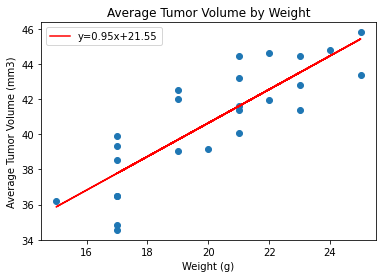

In [112]:
#Regression slope and y-intercept results form linregress 
slope = 0.9544396890241049
intercept= 21.552160532685008

#Calculating the line to plot 
reg_line = slope*(avgcap['Weight (g)'])+intercept

#Plot linear regression on top of scatter plot
plt.scatter(avgcap['Weight (g)'],avgcap['Tumor Volume (mm3)'])
plt.plot(avgcap['Weight (g)'], reg_line, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))

#Annotate linear regression
#plt.annotate

# Add labels, a legend and title to plot
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')
plt.legend()

#Display
plt.show()